# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
opts = ["SGD", "RMSprop", "Adagrad", "Adam"]

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的和optimizer並訓練模型
"""
for lr in LEARNING_RATE:
    for opt in opts:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        
        if opt == "SGD":
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        elif opt == "RMSprop":
            optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
        elif opt == "Adagrad":
            optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
        elif opt == "Adam":
            optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-" + str(lr) + "_" + opt
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

50000/50000 [==============================] - 4s 90us/step - loss: 1.5041 - acc: 0.4692 - val_loss: 1.6547 - val_acc: 0.4137
Epoch 49/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5076 - acc: 0.4673 - val_loss: 1.6464 - val_acc: 0.4320
Epoch 50/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4977 - acc: 0.4712 - val_loss: 1.7429 - val_acc: 0.4021.4985 - acc
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        

50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None

Epoch 49/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (

50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)   

50000/50000 [==============================] - 5s 91us/step - loss: 0.3785 - acc: 0.8652 - val_loss: 2.2205 - val_acc: 0.5250
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__________________________________________

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 105us/step - loss: 14.4444 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14

50000/50000 [==============================] - 5s 96us/step - loss: 2.0344 - acc: 0.2627 - val_loss: 1.8734 - val_acc: 0.3429
Epoch 2/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8122 - acc: 0.3632 - val_loss: 1.7699 - val_acc: 0.3774
Epoch 3/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.7269 - acc: 0.3951 - val_loss: 1.7066 - val_acc: 0.3978
Epoch 4/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.6690 - acc: 0.4160 - val_loss: 1.6492 - val_acc: 0.4239
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6205 - acc: 0.4322 - val_loss: 1.6090 - val_acc: 0.4344
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5825 - acc: 0.4458 - val_loss: 1.5871 - val_acc: 0.4400
Epoch 7/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5497 - acc: 0.4569 - val_loss: 1.5496 - val_acc: 0.4559
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.7867 - acc: 0.3588 - val_loss: 1.9082 - val_acc: 0.3163
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.7134 - acc: 0.3868 - val_loss: 1.7530 - val_acc: 0.3653
Epoch 5/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6582 - acc: 0.4090 - val_loss: 1.6403 - val_acc: 0.4089
Epoch 6/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6056 - acc: 0.4269 - val_loss: 1.6983 - val_acc: 0.3974
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5739 - acc: 0.4384 - val_loss: 1.6442 - val_acc: 0.4063
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5347 - acc: 0.4523 - val_loss: 1.6852 - val_acc: 0.3998
Epoch 9/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5027 - acc: 0.4620 - val_loss: 1.6183 - val_acc: 0.4251
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 5s 92us/step - loss: 1.6853 - acc: 0.4101 - val_loss: 1.7695 - val_acc: 0.3669
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6494 - acc: 0.4218 - val_loss: 1.7340 - val_acc: 0.3803
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6201 - acc: 0.4309 - val_loss: 1.6443 - val_acc: 0.4242
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5965 - acc: 0.4423 - val_loss: 1.6031 - val_acc: 0.4380
Epoch 8/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.5739 - acc: 0.4505 - val_loss: 1.5963 - val_acc: 0.4363
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5565 - acc: 0.4574 - val_loss: 1.5992 - val_acc: 0.4296
Epoch 10/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5395 - acc: 0.4612 - val_loss: 1.5659 - val_acc: 0.4469
Epoch 11/50
50000/50000 [==========================

Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4533 - acc: 0.4827 - val_loss: 1.5177 - val_acc: 0.4578
Epoch 7/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4271 - acc: 0.4901 - val_loss: 1.4499 - val_acc: 0.4839
Epoch 8/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4044 - acc: 0.5009 - val_loss: 1.4451 - val_acc: 0.4842
Epoch 9/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.3787 - acc: 0.5092 - val_loss: 1.4242 - val_acc: 0.4880
Epoch 10/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3492 - acc: 0.5197 - val_loss: 1.4106 - val_acc: 0.5018
Epoch 11/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3258 - acc: 0.5282 - val_loss: 1.4047 - val_acc: 0.4964
Epoch 12/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.2960 - acc: 0.5372 - val_loss: 1.3936 - val_acc: 0.5095
Epoch 13/50
50000/50000 [=============

50000/50000 [==============================] - 5s 90us/step - loss: 1.8883 - acc: 0.3425 - val_loss: 1.8802 - val_acc: 0.3415
Epoch 8/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.8668 - acc: 0.3499 - val_loss: 1.8605 - val_acc: 0.3497
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8486 - acc: 0.3556 - val_loss: 1.8448 - val_acc: 0.3592
Epoch 10/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8330 - acc: 0.3612 - val_loss: 1.8303 - val_acc: 0.3607
Epoch 11/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.8190 - acc: 0.3666 - val_loss: 1.8177 - val_acc: 0.3682
Epoch 12/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8065 - acc: 0.3706 - val_loss: 1.8050 - val_acc: 0.3724
Epoch 13/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7947 - acc: 0.3734 - val_loss: 1.7959 - val_acc: 0.3762
Epoch 14/50
50000/50000 [=======================

Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4849 - acc: 0.4763 - val_loss: 1.5982 - val_acc: 0.4376
Epoch 10/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.4643 - acc: 0.4828 - val_loss: 1.5505 - val_acc: 0.4541
Epoch 11/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4432 - acc: 0.4915 - val_loss: 1.5800 - val_acc: 0.4348
Epoch 12/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4185 - acc: 0.5002 - val_loss: 1.6297 - val_acc: 0.4164
Epoch 13/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4014 - acc: 0.5080 - val_loss: 1.6647 - val_acc: 0.4097
Epoch 14/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3839 - acc: 0.5133 - val_loss: 1.4444 - val_acc: 0.4869
Epoch 15/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3647 - acc: 0.5217 - val_loss: 1.5164 - val_acc: 0.4576
Epoch 16/50
50000/50000 [==========

50000/50000 [==============================] - 4s 90us/step - loss: 1.7677 - acc: 0.3837 - val_loss: 1.7695 - val_acc: 0.3838
Epoch 11/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7600 - acc: 0.3866 - val_loss: 1.7630 - val_acc: 0.3869
Epoch 12/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7527 - acc: 0.3894 - val_loss: 1.7554 - val_acc: 0.3906
Epoch 13/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7461 - acc: 0.3923 - val_loss: 1.7492 - val_acc: 0.3916
Epoch 14/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7400 - acc: 0.3942 - val_loss: 1.7426 - val_acc: 0.3941
Epoch 15/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7342 - acc: 0.3968 - val_loss: 1.7370 - val_acc: 0.3954
Epoch 16/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7285 - acc: 0.3987 - val_loss: 1.7326 - val_acc: 0.3958
Epoch 17/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 95us/step - loss: 1.3660 - acc: 0.5212 - val_loss: 1.4372 - val_acc: 0.4881
Epoch 12/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.3484 - acc: 0.5256 - val_loss: 1.4093 - val_acc: 0.5010
Epoch 13/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.3257 - acc: 0.5331 - val_loss: 1.3980 - val_acc: 0.5019
Epoch 14/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.3111 - acc: 0.5397 - val_loss: 1.4067 - val_acc: 0.4993
Epoch 15/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.2942 - acc: 0.5456 - val_loss: 1.3815 - val_acc: 0.5112
Epoch 16/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.2699 - acc: 0.5534 - val_loss: 1.4104 - val_acc: 0.5002
Epoch 17/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2540 - acc: 0.5606 - val_loss: 1.3569 - val_acc: 0.5158
Epoch 18/50
50000/50000 [=====================

Epoch 13/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.1164 - acc: 0.2503 - val_loss: 2.1106 - val_acc: 0.2500
Epoch 14/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.1066 - acc: 0.2530 - val_loss: 2.1013 - val_acc: 0.2539
Epoch 15/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.0973 - acc: 0.2585 - val_loss: 2.0924 - val_acc: 0.2573
Epoch 16/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.0886 - acc: 0.2607 - val_loss: 2.0840 - val_acc: 0.2609
Epoch 17/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.0802 - acc: 0.2656 - val_loss: 2.0760 - val_acc: 0.2623
Epoch 18/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.0722 - acc: 0.2670 - val_loss: 2.0683 - val_acc: 0.2660
Epoch 19/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0646 - acc: 0.2706 - val_loss: 2.0609 - val_acc: 0.2714
Epoch 20/50
50000/50000 [=========

50000/50000 [==============================] - 5s 93us/step - loss: 1.6381 - acc: 0.4317 - val_loss: 1.6534 - val_acc: 0.4215
Epoch 15/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6269 - acc: 0.4355 - val_loss: 1.6413 - val_acc: 0.4267
Epoch 16/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6164 - acc: 0.4383 - val_loss: 1.6343 - val_acc: 0.4264
Epoch 17/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.6063 - acc: 0.4426 - val_loss: 1.6170 - val_acc: 0.4300
Epoch 18/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5969 - acc: 0.4484 - val_loss: 1.6100 - val_acc: 0.4354
Epoch 19/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5875 - acc: 0.4493 - val_loss: 1.6093 - val_acc: 0.4399
Epoch 20/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5792 - acc: 0.4530 - val_loss: 1.6053 - val_acc: 0.4415
Epoch 21/50
50000/50000 [=====================

Epoch 16/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.0909 - acc: 0.2730 - val_loss: 2.0877 - val_acc: 0.2780
Epoch 17/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.0867 - acc: 0.2754 - val_loss: 2.0837 - val_acc: 0.2800
Epoch 18/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.0826 - acc: 0.2763 - val_loss: 2.0798 - val_acc: 0.2821
Epoch 19/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.0787 - acc: 0.2782 - val_loss: 2.0760 - val_acc: 0.2829
Epoch 20/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.0750 - acc: 0.2795 - val_loss: 2.0723 - val_acc: 0.2838
Epoch 21/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.0714 - acc: 0.2810 - val_loss: 2.0688 - val_acc: 0.2849
Epoch 22/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.0679 - acc: 0.2825 - val_loss: 2.0655 - val_acc: 0.2858
Epoch 23/50
50000/50000 [=========

50000/50000 [==============================] - 5s 93us/step - loss: 1.5737 - acc: 0.4532 - val_loss: 1.5840 - val_acc: 0.4499
Epoch 18/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5653 - acc: 0.4566 - val_loss: 1.5782 - val_acc: 0.4461
Epoch 19/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.5550 - acc: 0.4579 - val_loss: 1.5665 - val_acc: 0.4560
Epoch 20/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5448 - acc: 0.4629 - val_loss: 1.5621 - val_acc: 0.4592
Epoch 21/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.5357 - acc: 0.4666 - val_loss: 1.5533 - val_acc: 0.4556
Epoch 22/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.5273 - acc: 0.4695 - val_loss: 1.5459 - val_acc: 0.4609
Epoch 23/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.5194 - acc: 0.4724 - val_loss: 1.5453 - val_acc: 0.4645
Epoch 24/50
50000/50000 [=====================

['exp-lr-0.0001_Adagrad', 'exp-lr-0.1_Adagrad', 'exp-lr-0.01_Adam', 'exp-lr-0.0001_SGD', 'exp-lr-0.1_SGD', 'exp-lr-0.01_SGD', 'exp-lr-0.001_RMSprop', 'exp-lr-1e-05_RMSprop', 'exp-lr-0.0001_Adam', 'exp-lr-0.001_SGD', 'exp-lr-0.1_RMSprop', 'exp-lr-0.001_Adam', 'exp-lr-1e-05_Adagrad', 'exp-lr-0.1_Adam', 'exp-lr-1e-05_Adam', 'exp-lr-1e-05_SGD', 'exp-lr-0.0001_RMSprop', 'exp-lr-0.01_Adagrad', 'exp-lr-0.001_Adagrad', 'exp-lr-0.01_RMSprop']


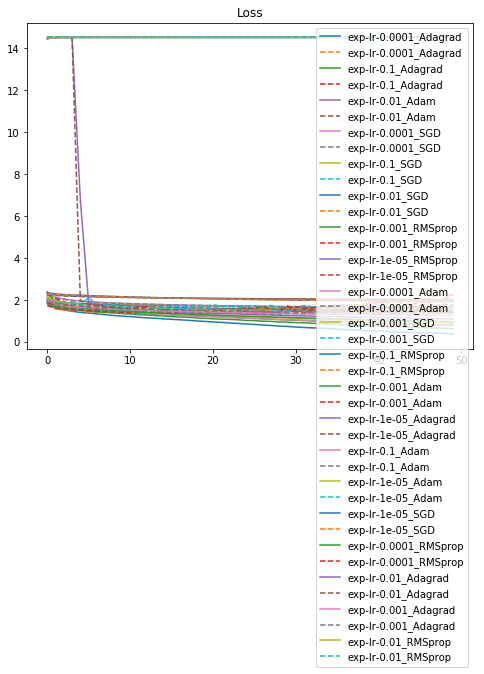

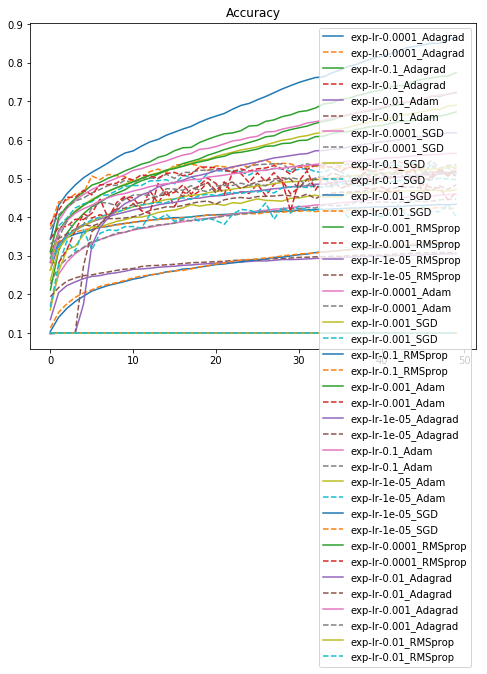

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
print(results.keys())
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()